# Kết nối Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Đọc dữ liệu

In [ ]:
import os
import pandas as pd

In [ ]:
%cd /content/drive/MyDrive/Data Mining Field-oriented/data/consolidated

In [ ]:
file_name = f"cleaned_articles_training.tsv"
try:
    df = pd.read_csv(file_name, sep="\t", encoding="utf-8")
except FileNotFoundError:
    print(f"File {file_name} not found.")

# Xây dựng chủ đề ẩn bằng LDA

In [ ]:
from gensim import corpora
from gensim.models import LdaModel

!pip3 install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

## Loại bỏ nhiễu khỏi văn bản

In [ ]:
import re

def preprocess(text):
    text = str(text)
    pattern_keep = r'(?<=[a-zA-Z0-9])(\.|,)(?=[a-zA-Z0-9])|(?<=[a-zA-Z])\.(?=\s|,|$)'

    # isbn_pattern = r'\b(?:\d{9}[\dXx]|\d{13})\b'
    # ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b|\b(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}\b'

    text = re.sub(pattern_keep, r'\1', text)

    pattern_remove = r'[.,](?=\s|$|[^a-zA-Z0-9])'
    cleaned_text = re.sub(pattern_remove, ' ', text)

    cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text)
    cleaned_text = re.sub(r'[/-]', ' ', cleaned_text)
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)
    cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text)

    return cleaned_text.strip().split()

## Tạo từ điển và ma trận Bag-of-Words

In [ ]:
df['content'] = df['content'].astype(str)
documents = df['content'].apply(lambda x: x.split()).tolist()

dictionary = corpora.Dictionary(documents)
print(f"Số lượng từ trong từ điển: {len(dictionary)}")

corpus = [dictionary.doc2bow(doc) for doc in documents]
print(f"Ví dụ Bag-of-Words cho tài liệu đầu tiên: {corpus[0]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Số lượng từ trong từ điển: 444710
Ví dụ Bag-of-Words cho tài liệu đầu tiên: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 4), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 5), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1)]


## Mô hình LDA

In [ ]:
num_topics = 12

lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

print("\nChủ đề LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Chủ đề {idx}:\n{topic}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Chủ đề LDA:
Chủ đề 0:
0.016*"quy_định" + 0.012*"Luật" + 0.011*"đất" + 0.011*"dự_án" + 0.009*"đầu_tư" + 0.008*"Bộ" + 0.007*"Quốc_hội" + 0.007*"năm" + 0.007*"người" + 0.007*"đối_với"

Chủ đề 1:
0.021*"người" + 0.010*"làm" + 0.008*"anh" + 0.007*"sự" + 0.007*"đi" + 0.006*"giúp" + 0.004*"món" + 0.004*"nhà" + 0.004*"nước" + 0.003*"gia_đình"

Chủ đề 2:
0.023*"Việt_Nam" + 0.019*"phát_triển" + 0.014*"sự" + 0.011*"nước" + 0.009*"cao" + 0.009*"năm" + 0.008*"hợp_tác" + 0.008*"hai" + 0.007*"kinh_tế" + 0.007*"doanh_nghiệp"

Chủ đề 3:
0.015*"người" + 0.012*"Công_an" + 0.008*"tỉnh" + 0.008*"tiền" + 0.008*"đối_tượng" + 0.007*"số" + 0.007*"thông_tin" + 0.007*"bệnh" + 0.007*"huyện" + 0.006*"vụ"

Chủ đề 4:
0.016*"điện" + 0.014*"sản_phẩm" + 0.010*"16" + 0.009*"Apple" + 0.009*"xe" + 0.009*"hàng" + 0.009*"sản_xuất" + 0.008*"khách_hàng" + 0.008*"giá" + 0.007*"công_nghệ"

Chủ đề 5:
0.015*"tỉnh" + 0.012*"công_tác" + 0.011*"tổ_chức" + 0.009*"xây_dựng" + 0.009*"Ban" + 0.008*"năm" + 0.008*"Chủ_tịch" + 0.007*"huyệ

## Đánh giá

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_perplexity(lda_model, corpus):
    return lda_model.log_perplexity(corpus)

def calculate_coherence(lda_model, texts, dictionary, coherence_type='c_v'):
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=texts,
        dictionary=dictionary,
        coherence=coherence_type
    )
    return coherence_model.get_coherence()

In [ ]:
results = []

for num_topics in range(10, 15):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    perplexity_score = calculate_perplexity(lda_model, corpus)

    coherence_score = calculate_coherence(lda_model, documents, dictionary, coherence_type='c_v')

    results.append({
        "num_topics": num_topics,
        "perplexity": perplexity_score,
        "coherence_score": coherence_score
    })

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


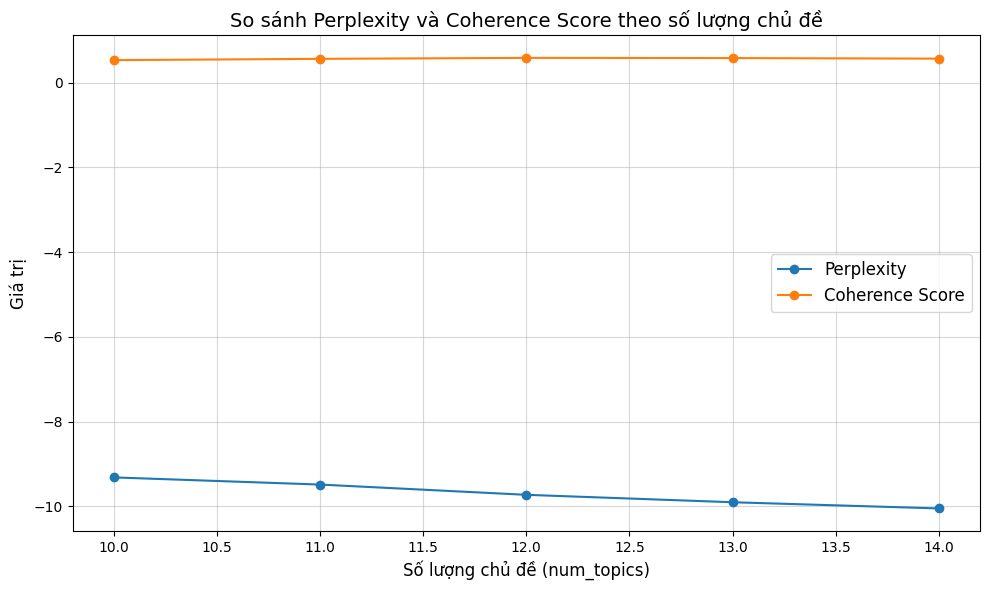

In [ ]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))

plt.plot(results_df['num_topics'], results_df['perplexity'], marker='o', label='Perplexity')

plt.plot(results_df['num_topics'], results_df['coherence_score'], marker='o', label='Coherence Score')

plt.title("So sánh Perplexity và Coherence Score theo số lượng chủ đề", fontsize=14)
plt.xlabel("Số lượng chủ đề (num_topics)", fontsize=12)
plt.ylabel("Giá trị", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

## Thống kê chủ đề

### Thống kê theo số lượng

In [ ]:
from collections import Counter

def get_stat(lda_model, corpus):
    stat = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        stat_count = max(topic_probs, key=lambda x: x[1])[0]
        stat.append(stat_count)
    return stat

stat = get_stat(lda_model, corpus)

topic_counts = Counter(stat)

print("\nSố lượng tài liệu thuộc mỗi chủ đề:")
for topic, count in topic_counts.items():
    print(f"Chủ đề {topic}: {count} tài liệu")

print(f"\nTổng số tài liệu: {sum(topic_counts.values())}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Số lượng tài liệu thuộc mỗi chủ đề:
Chủ đề 10: 7622 tài liệu
Chủ đề 2: 7295 tài liệu
Chủ đề 1: 18341 tài liệu
Chủ đề 5: 7776 tài liệu
Chủ đề 9: 4638 tài liệu
Chủ đề 11: 6537 tài liệu
Chủ đề 0: 8620 tài liệu
Chủ đề 4: 5384 tài liệu
Chủ đề 3: 11618 tài liệu
Chủ đề 6: 9364 tài liệu
Chủ đề 8: 8276 tài liệu
Chủ đề 7: 4374 tài liệu

Tổng số tài liệu: 99845


### Biểu diễn phân phối

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


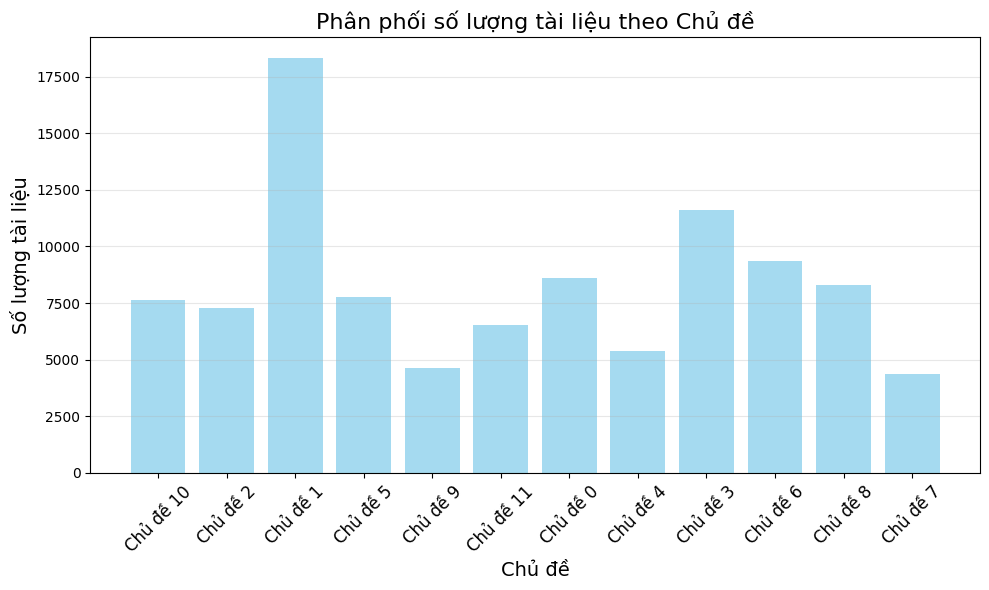

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

def get_stat_distribution(lda_model, corpus):
    topic_counts = Counter(stat)
    total_docs = sum(topic_counts.values())

    data = [
        {"Chủ đề": f"Chủ đề {topic}", "Số lượng tài liệu": count, "Phần trăm (%)": (count / total_docs) * 100}
        for topic, count in topic_counts.items()
    ]
    return pd.DataFrame(data)

def plot_topic_distribution(topic_distribution_df):
    plt.figure(figsize=(10, 6))
    plt.bar(topic_distribution_df['Chủ đề'], topic_distribution_df['Số lượng tài liệu'], color='skyblue', alpha=0.75)
    plt.title("Phân phối số lượng tài liệu theo Chủ đề", fontsize=16)
    plt.xlabel("Chủ đề", fontsize=14)
    plt.ylabel("Số lượng tài liệu", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

num_topics = 12
distribution_df = get_stat_distribution(lda_model, corpus)
plot_topic_distribution(distribution_df)

### Lấy ra 200 từ nổi bật

In [ ]:
%cd /content/drive/MyDrive/Data Mining Field-oriented/stats

/content/drive/.shortcut-targets-by-id/1RRu-R6hm1MkKpo2-XcloxTBP7mzJuoJU/KPDLHLV /stats


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def export_topics_to_csv(lda_model, num_topics, dictionary, output_file):
    topics = {}
    for topic_id in range(num_topics):
        topic_words = lda_model.show_topic(topic_id, topn=200)
        topics[f"Chủ đề {topic_id}"] = [word for word, weight in topic_words]

    topic_df = pd.DataFrame.from_dict(topics, orient="index").transpose()

    topic_df.to_csv(output_file, index=False, encoding="utf-8-sig")
    print(f"Danh sách từ nổi bật đã được xuất ra file: {output_file}")

output_file = "topics_words_12.csv"
export_topics_to_csv(lda_model, num_topics, dictionary, output_file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Danh sách từ nổi bật đã được xuất ra file: topics_words_12.csv


### Thống kê tài liệu theo các chủ đề ẩn

In [ ]:
%cd /content/drive/MyDrive/Data Mining Field-oriented/data/individual contribution/Tâm

In [ ]:
def get_documents_topic_distribution_with_content(lda_model, corpus, num_topics, content_list, top_n=5):
    data = []
    for doc_index, doc_bow in enumerate(corpus):
        topic_probs = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        topic_probs_sorted = sorted(topic_probs, key=lambda x: x[1], reverse=True)[:top_n]

        row = {"Tài liệu": f"Tài liệu {doc_index + 1}", "Nội dung": content_list[doc_index]}
        for i, (topic_id, prob) in enumerate(topic_probs_sorted):
            row[f"Chủ đề {i + 1}"] = f"Chủ đề {topic_id} ({prob:.2%})"
        data.append(row)
    return pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
content_list = df['content'].tolist()

top_n_topics = 5
documents_topic_df_with_content = get_documents_topic_distribution_with_content(
    lda_model, corpus, num_topics, content_list, top_n=top_n_topics
)

documents_with_content_output_file = "12 chủ đề.csv"
documents_topic_df_with_content.to_csv(documents_with_content_output_file, index=False, encoding="utf-8-sig")

print(f"File đã được lưu: {documents_with_content_output_file}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


File đã được lưu: 12 chủ đề.csv


### Thống kê tài liệu bị nhập nhằng chủ đề (threshold = 5%)

In [ ]:
def extract_percentage(value):
    import re
    match = re.search(r"\(([\d.]+)%\)", value)
    return float(match.group(1)) if match else 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
documents_topic_df_with_content["Chủ đề 1 (%)"] = documents_topic_df_with_content["Chủ đề 1"].apply(extract_percentage)
documents_topic_df_with_content["Chủ đề 2 (%)"] = documents_topic_df_with_content["Chủ đề 2"].apply(extract_percentage)

documents_topic_df_with_content["Chênh lệch (%)"] = abs(documents_topic_df_with_content["Chủ đề 1 (%)"] - documents_topic_df_with_content["Chủ đề 2 (%)"])

documents_topic_df_with_content["Nhập nhằng"] = documents_topic_df_with_content["Chênh lệch (%)"] < 5

total_documents = len(documents_topic_df_with_content)
ambiguous_documents = documents_topic_df_with_content["Nhập nhằng"].sum()
ambiguity_ratio = (ambiguous_documents / total_documents) * 100

print(f"Tổng số tài liệu: {total_documents}")
print(f"Số lượng tài liệu nhập nhằng: {ambiguous_documents}")
print(f"Tỉ lệ tài liệu nhập nhằng: {ambiguity_ratio:.2f}%")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tổng số tài liệu: 99845
Số lượng tài liệu nhập nhằng: 8029
Tỉ lệ tài liệu nhập nhằng: 8.04%


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Data Mining Field-oriented/data/individual contribution/Tâm/thống kê nhập nhằng.csv"

documents_topic_df_with_content_14 = pd.read_csv(file_path)
# print(documents_topic_df_with_content_14.head())

documents_topic_df_with_content_14["Chủ đề 1"] = documents_topic_df_with_content_14["Chủ đề 1"].astype(str)
documents_topic_df_with_content_14["Chủ đề 2"] = documents_topic_df_with_content_14["Chủ đề 2"].astype(str)

documents_topic_df_with_content_14["Chủ đề 1 (%)"] = documents_topic_df_with_content_14["Chủ đề 1"].apply(extract_percentage)
documents_topic_df_with_content_14["Chủ đề 2 (%)"] = documents_topic_df_with_content_14["Chủ đề 2"].apply(extract_percentage)

documents_topic_df_with_content_14["Chênh lệch (%)"] = abs(documents_topic_df_with_content_14["Chủ đề 1 (%)"] - documents_topic_df_with_content_14["Chủ đề 2 (%)"])

documents_topic_df_with_content_14["Nhập nhằng"] = documents_topic_df_with_content_14["Chênh lệch (%)"] < 5

total_documents = len(documents_topic_df_with_content_14)
ambiguous_documents = documents_topic_df_with_content_14["Nhập nhằng"].sum()
ambiguity_ratio = (ambiguous_documents / total_documents) * 100

print(f"Tổng số tài liệu: {total_documents}")
print(f"Số lượng tài liệu nhập nhằng: {ambiguous_documents}")
print(f"Tỉ lệ tài liệu nhập nhằng: {ambiguity_ratio:.2f}%")

<ipython-input-11-b16478d12937>:5: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207) have mixed types. Specify dtype option on import or set low_memory=False.
  documents_topic_df_with_content_14 = pd.read_csv(file_path)


Tổng số tài liệu: 99849
Số lượng tài liệu nhập nhằng: 7769
Tỉ lệ tài liệu nhập nhằng: 7.78%


In [ ]:
import pandas as pd
from collections import Counter
from collections import defaultdict

def get_ambiguous_pair_without_percentage(row):
    if row["Nhập nhằng"]:
        topic1 = row["Chủ đề 1"].split(" (")[0]
        topic2 = row["Chủ đề 2"].split(" (")[0]
        return tuple(sorted([topic1, topic2]))
    return None

documents_topic_df_with_content_14["Cặp nhập nhằng"] = documents_topic_df_with_content_14.apply(get_ambiguous_pair_without_percentage, axis=1)
ambiguous_pairs = documents_topic_df_with_content_14["Cặp nhập nhằng"].dropna()

pair_counts = Counter(ambiguous_pairs)

grouped_pairs = Counter(pair_counts)
grouped_pairs_sorted = sorted(grouped_pairs.items(), key=lambda x: x[1], reverse=True)

total_ambiguous = sum(pair_counts.values())

pair_differences = defaultdict(list)
for _, row in documents_topic_df_with_content_14.iterrows():
    if row["Cặp nhập nhằng"]:
        pair_differences[row["Cặp nhập nhằng"]].append(row["Chênh lệch (%)"])

grouped_pairs_with_average = []
for pair, differences in pair_differences.items():
    avg_difference = sum(differences) / len(differences)
    grouped_pairs_with_average.append((pair[0], pair[1], len(differences), avg_difference))

grouped_pairs_with_average_sorted = sorted(grouped_pairs_with_average, key=lambda x: x[3])

print("\nThống kê số lần nhập nhằng và trung bình chênh lệch (sắp xếp theo trung bình chênh lệch):")
for topic1, topic2, total, avg_difference in grouped_pairs_with_average_sorted:
    print(f"{topic1} - {topic2}: {total} lần, Trung bình chênh lệch: {avg_difference:.2f}%")


Thống kê số lần nhập nhằng và trung bình chênh lệch (sắp xếp theo trung bình chênh lệch):
nan - nan: 4 lần, Trung bình chênh lệch: 0.00%
 du_khách công_chúng; quy_định nhiệm_vụ giám_định hiện_vật -  sưu_tầm cổ_vật; quy_định nhiệm_vụ nghiên_cứu lập hồ_sơ khoa_học xếp_hạng di_tích di_sản văn_hoá phi vật_thể khoản 1 Điều 68 Dự_thảo luật. chính_sách đối_với nghệ_nhân: 1 lần, Trung bình chênh lệch: 0.00%
 Trưởng Ban Công_tác đại_biểu Uỷ_ban Thường_vụ Quốc_hội Nguyễn_Thanh_Hải Dự_kiến họp Kỳ họp tám 2110 -  phát_thanh trực_tiếp. công_tác nhân_sự: 2 lần, Trung bình chênh lệch: 0.00%
Chủ đề 0 - Chủ đề 7: 1 lần, Trung bình chênh lệch: 0.00%
Chủ đề 3 - Chủ đề 5: 3 lần, Trung bình chênh lệch: 0.34%
Chủ đề 6 - Chủ đề 9: 1 lần, Trung bình chênh lệch: 0.39%
Chủ đề 3 - Chủ đề 8: 2 lần, Trung bình chênh lệch: 0.45%
Chủ đề 3 - Chủ đề 7: 1 lần, Trung bình chênh lệch: 0.77%
Chủ đề 0 - Chủ đề 1: 259 lần, Trung bình chênh lệch: 0.98%
Chủ đề 4 - Chủ đề 5: 5 lần, Trung bình chênh lệch: 1.04%
Chủ đề 11 - Chủ